<a href="https://colab.research.google.com/github/0ginny/TIL/blob/main/240423_Q_Table_FrozenLake_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reference : https://github.com/awjuliani/DeepRL-Agents/blob/master/Q-Table.ipynb

# OpenAI Gym 및 시각화를 위한 라이브러리 설치


In [12]:
!apt-get install -y xvfb x11-utils
!pip install PyOpenGL
!pip install PyOpenGL-accelerate
!pip install gym[all]==0.17.*
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install colabgymrender
!pip install pyvirtualdisplay

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 libxtst6 libxxf86dga1 x11-xkb-utils xfonts-base
  xfonts-encodings xfonts-utils xserver-common
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 libxtst6 libxxf86dga1 x11-utils x11-xkb-utils xfonts-base
  xfonts-encodings xfonts-utils xserver-common xvfb
0 upgraded, 12 newly installed, 0 to remove and 45 not upgraded.
Need to get 8,045 kB of archives.
After this operation, 12.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.

In [8]:
# 작동 안됨.
# %%bash
# # Install additional packages for visualization
# sudo apt-get update
# sudo apt-get install -y xvfb python-opengl > /dev/null 2>&1

# pip install pyvirtualdisplay > /dev/null 2>&1
# pip install git+https://github.com/tensorflow/docs > /dev/null 2>&1
# pip install gym[classic_control]

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists...


# OpenAI Gym 및 시각화를 위한 라이브러리 import


In [14]:
from IPython import display as ipythondisplay
from PIL import Image
from pyvirtualdisplay import Display

In [15]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# FrozenLake 환경 설정

In [16]:
env = gym.make('FrozenLake-v1')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [17]:
# Render한 결과를 gif로 저장
display = Display(visible=0, size=(400, 300))
display.start()

In [18]:
state = env.reset()

screen = env.render(mode='rgb_array')
im = Image.fromarray(screen)
images = [im]

/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [19]:
# 20번의 에피소드를 실행
for i_episode in range(20):
    # 새로운 에피소드(initial environment)를 불러온다(reset)
    observation = env.reset()
    for t in range(100):
        screen = env.render(mode='rgb_array')
        images.append(Image.fromarray(screen))

        # 행동(action)을 취하기 이전에 환경에 대해 얻은 관찰값(observation)
        print('observation before action :', observation)
        # 랜덤하게 행동을 선택
        action = env.action_space.sample()
        print('acition :', action)
        observation, reward, done, info = env.step(action)
        # 행동(action)을 취한 이후에 환경에 대해 얻은 관찰값(observation)
        print('observation after action :', observation)

        if reward == 1:
            print(i, 'Goal 지점 도달!')

        # 에피소드 종료
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

observation before action : 0
acition : 0
observation after action : 4
observation before action : 4
acition : 1
observation after action : 8
observation before action : 8
acition : 0
observation after action : 12
Episode finished after 3 timesteps
observation before action : 0
acition : 0
observation after action : 0
observation before action : 0
acition : 3
observation after action : 0
observation before action : 0
acition : 3
observation after action : 0
observation before action : 0
acition : 0
observation after action : 0
observation before action : 0
acition : 1
observation after action : 0
observation before action : 0
acition : 0
observation after action : 4
observation before action : 4
acition : 1
observation after action : 4
observation before action : 4
acition : 0
observation after action : 8
observation before action : 8
acition : 1
observation after action : 8
observation before action : 8
acition : 2
observation after action : 9
observation before action : 9
acition : 1

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


observation before action : 0
acition : 3
observation after action : 1
observation before action : 1
acition : 0
observation after action : 0
observation before action : 0
acition : 0
observation after action : 4
observation before action : 4
acition : 0
observation after action : 0
observation before action : 0
acition : 2
observation after action : 1
observation before action : 1
acition : 1
observation after action : 2
observation before action : 2
acition : 3
observation after action : 3
observation before action : 3
acition : 1
observation after action : 3
observation before action : 3
acition : 0
observation after action : 2
observation before action : 2
acition : 3
observation after action : 3
observation before action : 3
acition : 3
observation after action : 2
observation before action : 2
acition : 2
observation after action : 3
observation before action : 3
acition : 2
observation after action : 3
observation before action : 3
acition : 2
observation after action : 3
observ

In [20]:
# Render한 결과를 gif로 저장합니다.
image_file = 'frozenlake-v0-random.gif'
# duration=1: 각 frame을 1ms 속도로 실행합니다.
images[0].save(image_file, save_all=True, append_images=images[1:], duration=1)

# 랜덤하게 Play한 FrozenLake 실행 결과를 시각화

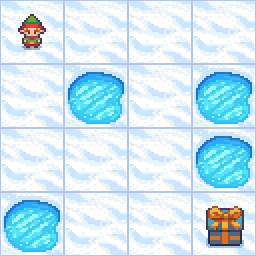

In [21]:
from IPython.display import Image as disImage
disImage(open(image_file,'rb').read())

# Q-Table 방식의 Q-Learning을 이용한 학습

In [22]:
state = env.reset()

screen = env.render(mode='rgb_array')
im = Image.fromarray(screen)
images = [im]

In [23]:
# 전체 Q-Tale의 값을 0으로 초기화
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [24]:
# 학습을 위한 파라미터 설정
lr = .8 # alpha
y = .95 # discount factor
num_episodes = 5000

In [25]:
# 리워드를 저장할 리스트 생성
rList = []

In [26]:
for i in range(num_episodes):
    # 에피소드마다 환경을 리셋
    s = env.reset()
    rAll = 0
    d = False
    j = 0


    # Q-Table을 갱신
    while j < 99:
        j+=1
        # 약간의 노이즈(Exploration을 위해)와 함께 가장 Q가 큰 행동을 선택
        a = np.argmax(Q[s,:] + np.random.randn(1, env.action_space.n)*(1./(i+1)))

        # 마지막 10개의 episode를 gif로 저장하기 위해 render
        if i > 4990:
            screen = env.render(mode='rgb_array')
            images.append(Image.fromarray(screen))

        # 행동을 취하고 다음 Step으로 넘어감
        s1,r,d,_ = env.step(a)
        # Q-Learning 공식에 의해 Q-Table의 값을 갱신
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        # reward를 리스트에 추가
        rAll += r
        if r == 1:
          print(i, 'Goal 지점 도달!')
        # state 갱신
        s = s1
        if d == True:
            break
    rList.append(rAll)

20 Goal 지점 도달!
26 Goal 지점 도달!
52 Goal 지점 도달!
57 Goal 지점 도달!
72 Goal 지점 도달!
83 Goal 지점 도달!
84 Goal 지점 도달!
96 Goal 지점 도달!
99 Goal 지점 도달!
102 Goal 지점 도달!
104 Goal 지점 도달!
111 Goal 지점 도달!
112 Goal 지점 도달!
114 Goal 지점 도달!
115 Goal 지점 도달!
116 Goal 지점 도달!
118 Goal 지점 도달!
123 Goal 지점 도달!
134 Goal 지점 도달!
142 Goal 지점 도달!
144 Goal 지점 도달!
145 Goal 지점 도달!
146 Goal 지점 도달!
148 Goal 지점 도달!
154 Goal 지점 도달!
156 Goal 지점 도달!
157 Goal 지점 도달!
161 Goal 지점 도달!
162 Goal 지점 도달!
163 Goal 지점 도달!
164 Goal 지점 도달!
170 Goal 지점 도달!
171 Goal 지점 도달!
175 Goal 지점 도달!
176 Goal 지점 도달!
177 Goal 지점 도달!
178 Goal 지점 도달!
180 Goal 지점 도달!
181 Goal 지점 도달!
185 Goal 지점 도달!
188 Goal 지점 도달!
189 Goal 지점 도달!
192 Goal 지점 도달!
196 Goal 지점 도달!
199 Goal 지점 도달!
203 Goal 지점 도달!
207 Goal 지점 도달!
214 Goal 지점 도달!
215 Goal 지점 도달!
218 Goal 지점 도달!
219 Goal 지점 도달!
222 Goal 지점 도달!
224 Goal 지점 도달!
227 Goal 지점 도달!
228 Goal 지점 도달!
230 Goal 지점 도달!
237 Goal 지점 도달!
239 Goal 지점 도달!
241 Goal 지점 도달!
243 Goal 지점 도달!
245 Goal 지점 도달!
248 Goal 지점 도달!
250 Goal 지점 도달!
2

In [29]:
print(np.round(Q,3))

[[0.166 0.002 0.002 0.002]
 [0.    0.001 0.001 0.169]
 [0.001 0.093 0.001 0.001]
 [0.    0.    0.    0.076]
 [0.138 0.001 0.    0.001]
 [0.    0.    0.    0.   ]
 [0.    0.    0.003 0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.448]
 [0.    0.671 0.    0.   ]
 [0.158 0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.322 0.   ]
 [0.    0.946 0.    0.   ]
 [0.    0.    0.    0.   ]]


In [27]:
print("Score over time: " +  str(sum(rList)/num_episodes))

Score over time: 0.5858


In [28]:
print("Final Q-Table Values")
print(Q)

Final Q-Table Values
[[1.66318591e-01 2.33088136e-03 2.46574330e-03 2.23296732e-03]
 [1.21047017e-04 1.39219287e-03 6.55801209e-04 1.69207346e-01]
 [6.85264874e-04 9.27538029e-02 7.27255378e-04 1.34893263e-03]
 [7.34459768e-05 2.40691408e-04 1.19725684e-04 7.61172348e-02]
 [1.38428881e-01 5.11508407e-04 3.60581616e-04 9.22799074e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.42859637e-05 1.28262152e-04 2.71416080e-03 2.33104034e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.13794446e-04 0.00000000e+00 4.48454920e-01]
 [0.00000000e+00 6.71131612e-01 0.00000000e+00 2.73329341e-04]
 [1.57765962e-01 0.00000000e+00 3.79408752e-05 7.73265201e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.22021306e-01 0.00000000e+00]
 [0.00000000e+00 9.46204014e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.

In [ ]:
print(np.round(Q,3))

[[0.286 0.007 0.007 0.006]
 [0.    0.    0.002 0.22 ]
 [0.003 0.111 0.003 0.   ]
 [0.001 0.001 0.001 0.086]
 [0.32  0.001 0.001 0.003]
 [0.    0.    0.    0.   ]
 [0.    0.    0.05  0.   ]
 [0.    0.    0.    0.   ]
 [0.001 0.001 0.002 0.418]
 [0.002 0.786 0.    0.001]
 [0.343 0.001 0.001 0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.018 0.    0.838 0.   ]
 [0.    0.    0.972 0.   ]
 [0.    0.    0.    0.   ]]


In [30]:
# Render한 결과를 gif로 저장합니다.
image_file = 'frozenlake-v0-q-table.gif'
# duration=1: 각 frame을 1ms 속도로 실행합니다.
images[0].save(image_file, save_all=True, append_images=images[1:], duration=1)

# Q-Table로 Play한 FrozenLake 실행 결과를 시각화

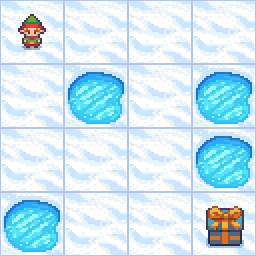

In [31]:
from IPython.display import Image as disImage
disImage(open(image_file,'rb').read())

한계

state가 무한에 가까워지면 모든 경우 action을 할 수는 없음.

ex) 벽돌깨기의 경우, 벽돌이 깨질때마다 state 가 달라져서 어려움.

대안으로 DQN 기법이 고안되었음.